In [24]:
from scipy.io import wavfile
from scipy import signal
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

file = './data/train/audio/go/004ae714_nohash_1.wav'

In [25]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [26]:
sample_rate, samples = wavfile.read(file)

In [27]:
print(sample_rate)

16000


In [36]:
print("samples: ", samples, "\nsamples len: ", len(samples), "\nsamples size: ", samples.size)

samples:  [-28 -41 -56 ... -96 -66 -19] 
samples len:  11889 
samples size:  11889


In [46]:
d = np.pad(samples, (16000 - samples.size, 0), mode='constant')
print(d)
spg = signal.spectrogram(d, nperseg=256, noverlap=128)[2]
spg = spg.reshape(129, 124, -1)
# print(spg)

[  0   0   0 ... -96 -66 -19]


In [29]:
ipd.Audio(samples, rate=sample_rate)

In [30]:
ipd.Audio(samples, rate=sample_rate/2)

In [50]:
ipd.Audio(samples[7100:], rate=sample_rate/4)

In [32]:
freqs, times, spectrogram = log_specgram(samples, sample_rate)
print("freqs:\n", freqs, "\n")
print("times:\n", times, "\n")
print("spectrogram:\n", spectrogram, "\n")

freqs:
 [   0.   50.  100.  150.  200.  250.  300.  350.  400.  450.  500.  550.
  600.  650.  700.  750.  800.  850.  900.  950. 1000. 1050. 1100. 1150.
 1200. 1250. 1300. 1350. 1400. 1450. 1500. 1550. 1600. 1650. 1700. 1750.
 1800. 1850. 1900. 1950. 2000. 2050. 2100. 2150. 2200. 2250. 2300. 2350.
 2400. 2450. 2500. 2550. 2600. 2650. 2700. 2750. 2800. 2850. 2900. 2950.
 3000. 3050. 3100. 3150. 3200. 3250. 3300. 3350. 3400. 3450. 3500. 3550.
 3600. 3650. 3700. 3750. 3800. 3850. 3900. 3950. 4000. 4050. 4100. 4150.
 4200. 4250. 4300. 4350. 4400. 4450. 4500. 4550. 4600. 4650. 4700. 4750.
 4800. 4850. 4900. 4950. 5000. 5050. 5100. 5150. 5200. 5250. 5300. 5350.
 5400. 5450. 5500. 5550. 5600. 5650. 5700. 5750. 5800. 5850. 5900. 5950.
 6000. 6050. 6100. 6150. 6200. 6250. 6300. 6350. 6400. 6450. 6500. 6550.
 6600. 6650. 6700. 6750. 6800. 6850. 6900. 6950. 7000. 7050. 7100. 7150.
 7200. 7250. 7300. 7350. 7400. 7450. 7500. 7550. 7600. 7650. 7700. 7750.
 7800. 7850. 7900. 7950. 8000.] 

times:
 [

Text(0.5, 0, 'Seconds')

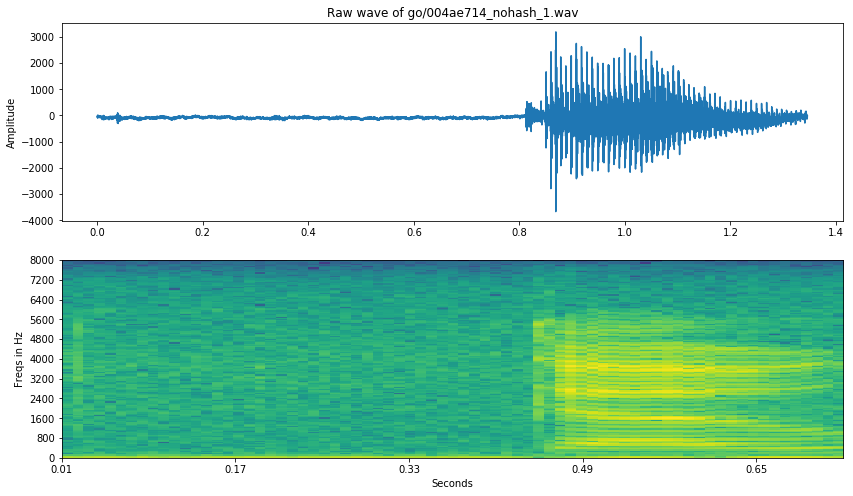

In [48]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of go/004ae714_nohash_1.wav')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), len(samples)), samples)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
# ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

Text(0.5, 0, 'Seconds')

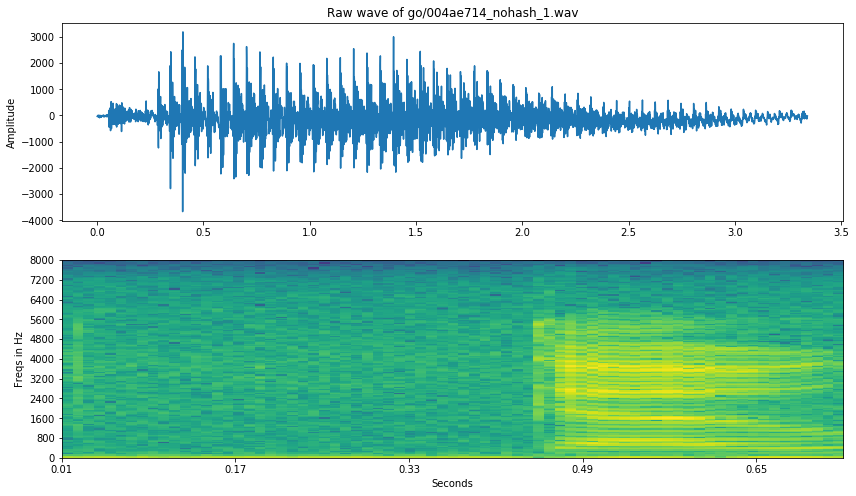

In [34]:
sample_cut = samples[7100:]
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of go/004ae714_nohash_1.wav')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(sample_cut), len(sample_cut)), sample_cut)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
# ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

Text(0.5, 0, 'Seconds')

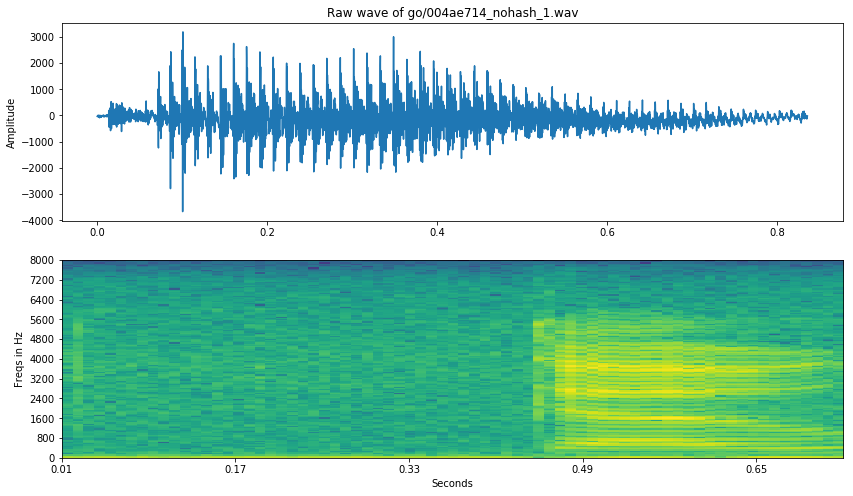

In [35]:
sample_cut = samples[7100:]
new_sr = sample_rate / 4
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of go/004ae714_nohash_1.wav')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, new_sr/len(sample_cut), len(sample_cut)), sample_cut)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
# ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

In [ ]:
sample_cut = spg
new_sr = sample_rate / 4
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of go/004ae714_nohash_1.wav')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, new_sr/len(sample_cut), len(sample_cut)), sample_cut)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
# ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')